In [1]:
from sklearn.datasets import fetch_covtype
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
samples = fetch_covtype()
print(samples.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional 

In [5]:
X = samples.data
y = samples.target

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = keras.Sequential([
    Dense(128, activation="relu", input_shape = (X_train.shape[1],)),
    Dense(64, activation="relu"),
    Dense(7, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

C:\Users\sharag\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.7499 - loss: 0.5893 - val_accuracy: 0.8139 - val_loss: 0.4377
Epoch 2/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8259 - loss: 0.4123 - val_accuracy: 0.8443 - val_loss: 0.3772
Epoch 3/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8481 - loss: 0.3662 - val_accuracy: 0.8552 - val_loss: 0.3513
Epoch 4/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8601 - loss: 0.3389 - val_accuracy: 0.8633 - val_loss: 0.3298
Epoch 5/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.8677 - loss: 0.3206 - val_accuracy: 0.8709 - val_loss: 0.3149
Epoch 6/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8743 - loss: 0.3072 - val_accuracy: 0.8752 - val_loss: 0.3066
Epoch 7/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8798 - loss: 0.2938 - val_accuracy: 0.8836 - val_loss: 0.2884
Epoch 8/50
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 3s 850us/step


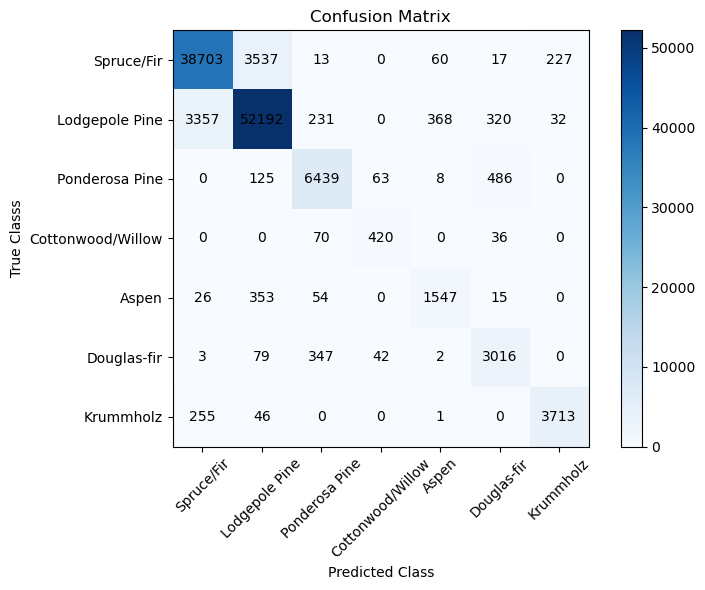

In [14]:
import matplotlib.pyplot as plt
from sklearn import metrics

class_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.xticks(range(len(class_labels)), class_labels, rotation=45)
plt.yticks(range(len(class_labels)), class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Classs")
plt.title("Confusion Matrix")
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i,j], ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()

In [15]:
#Confusion matrix shows two dominant classes in the samples. Hence checking frequency distribution
from collections import Counter
class_counts = Counter(y)
print("Class frequency distribution:\n", class_counts)

Class frequency distribution:
 Counter({1: 283301, 0: 211840, 2: 35754, 6: 20510, 5: 17367, 4: 9493, 3: 2747})


In [16]:
# One way to reduce class imbalance is to use undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# NearMiss is another undersampling library
#from imblearn.under_sampling import NearMiss
#majority_class = class_counts.most_common(1)[0][0]
#under_sampler = RandomUnderSampler(sampling_strategy={majority_class:class_counts[majority_class] // 7})
#under_sampler = NearMiss(version=1, sampling_strategy={majority_class:class_counts[majority_class] // 2})

#Further reading on handling imbalance data - https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [17]:
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

In [18]:
resampled_counts = Counter(y_resampled)
print("Resampled Class frequency distribution:\n", resampled_counts)

Resampled Class frequency distribution:
 Counter({0: 2747, 1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747})


In [19]:
# Training the model using resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    Dense(128, activation="relu", input_shape = (X_train.shape[1],)),
    Dense(64, activation="relu"),
    Dense(7, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


C:\Users\sharag\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5728 - loss: 1.1100 - val_accuracy: 0.6914 - val_loss: 0.7250
Epoch 2/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.7148 - loss: 0.6798 - val_accuracy: 0.7244 - val_loss: 0.6399
Epoch 3/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7381 - loss: 0.6211 - val_accuracy: 0.7460 - val_loss: 0.6113
Epoch 4/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7556 - loss: 0.5834 - val_accuracy: 0.7454 - val_loss: 0.5902
Epoch 5/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7755 - loss: 0.5320 - val_accuracy: 0.7577 - val_loss: 0.5927
Epoch 6/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.5098 - val_accuracy: 0.7696 - val_loss: 0.5367
Epoch 7/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7940 - loss: 0.4942 - val_accuracy: 0.7863 - val_loss: 0.5281
Epoch 8/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8072 - loss: 0.4675 - val_accuracy: 0.7865 - va

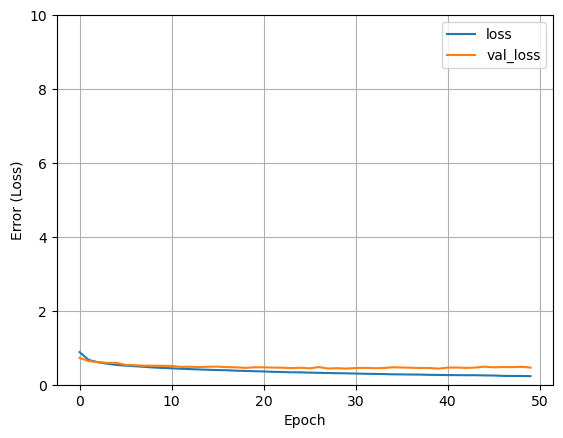

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel("Epoch")
plt.ylabel("Error (Loss)")
plt.legend()
plt.grid(True)

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


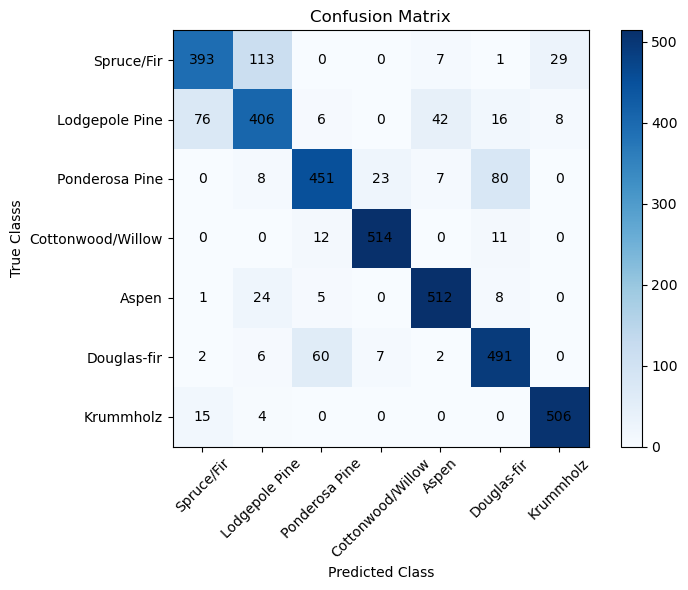

In [22]:
import matplotlib.pyplot as plt
from sklearn import metrics

class_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.xticks(range(len(class_labels)), class_labels, rotation=45)
plt.yticks(range(len(class_labels)), class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Classs")
plt.title("Confusion Matrix")
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i,j], ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()